<a href="https://colab.research.google.com/github/M-Salim-I/Other-Projects/blob/main/MNSIT_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code adapted and inspired from:
https://pythonprogramming.net/data-deep-learning-neural-network-pytorch/

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
train = datasets.MNIST('', train = True, download = True,
                       transform = transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train = False, download = True,
                       transform = transforms.Compose([
                           transforms.ToTensor()
                       ]))

HYPERPARAMETRS

In [ ]:
BS = 10
LR = 1e-3
EPOCHS = 3

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size = BS, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = BS, shuffle = False)

In [ ]:
for data in trainset:
  X, y = data
  print("X: ", X.shape)
  break

X:  torch.Size([10, 1, 28, 28])


We are dealing with grayscale imgaes as the number of channels in tensor `X` is 1 with each image of size 28 x28

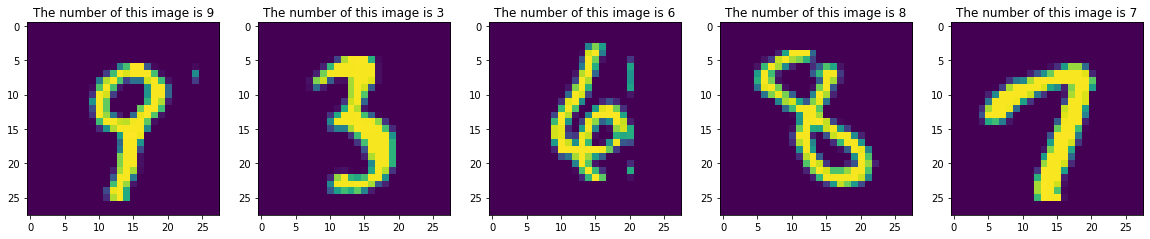

In [ ]:
# visualising the 1st 5 numbers in our training set in the 1st batch
fig, ax = plt.subplots(1, 5, figsize = (20, 20))

img = 0
for data in trainset:
  while img < 5:
    ax[img].imshow(data[0][img].view(28, 28))
    ax[img].set_title(f'The number of this image is {data[1][img]}')
    img += 1

In [ ]:
total = 0
counter_dict = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
# % of each number in the data
for num in counter_dict:
  print(f'{num}: {(counter_dict[num] / total) * 100}')

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


Imbalanced data set, but differences between each class is really small since the %'s are between 9 and 11

In [ ]:
class MNIST_NET(nn.Module):
    def __init__(self):
        super().__init__()
        self.FC1 = nn.Linear(28 * 28 , 64)
        self.FC2 = nn.Linear(64, 64)
        self.FC3 = nn.Linear(64, 64)
        self.FC4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.FC1(x))
        x = F.relu(self.FC2(x))
        x = F.relu(self.FC3(x))
        x = self.FC4(x)
        return F.log_softmax(x, dim = 1)

net = MNIST_NET()
print(net)

MNIST_NET(
  (FC1): Linear(in_features=784, out_features=64, bias=True)
  (FC2): Linear(in_features=64, out_features=64, bias=True)
  (FC3): Linear(in_features=64, out_features=64, bias=True)
  (FC4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = LR)

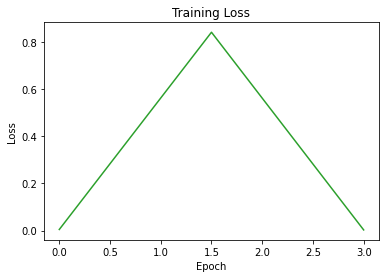

In [ ]:
loss_vals = []
for epoch in range(EPOCHS): # EPOCHS full passes over the data
    for data in trainset:  # data is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc to avoid accumulation of gradients
        y_pred = net(X.view(-1, 784))  # pass in the reshaped batch (recall they are 28x28 atm)
        # the predictions are not in 1 hot vector form
        loss = F.nll_loss(y_pred, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    loss_vals.append(loss.item())

x = torch.linspace(0, len(loss_vals), len(loss_vals))
plt.plot(x, loss_vals, color = 'C2', label = 'Training loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss");

In [ ]:
correct, total = 0, 0

with torch.no_grad():
    for data in testset:
        X, y = data
        pred = net(X.view(-1,784))
        for idx, i in enumerate(pred):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", f'{round(correct / total, 3) * 100}', "%")

Accuracy:  97.2 %
